# Data Preparation

In [1]:
# Importing relevant libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Import Dataset
df = pd.read_csv('6 class csv.csv')

In [3]:
#Display Dataset
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [4]:
#Dataset Description
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [5]:
# Clean dataset
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [6]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [7]:
# Data transformation (label encoder fit transform)
label_encoder = LabelEncoder()

# Encode each column individually
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [8]:
#Dataset Info After Encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int32  
 6   Spectral Class          240 non-null    int32  
dtypes: float64(3), int32(2), int64(2)
memory usage: 11.4 KB


# Exploratory Data Analysis (EDA)

In [24]:
#data types
df.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                  int32
Spectral Class              int32
dtype: object

<module 'matplotlib.pyplot' from 'C:\\Users\\sha\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

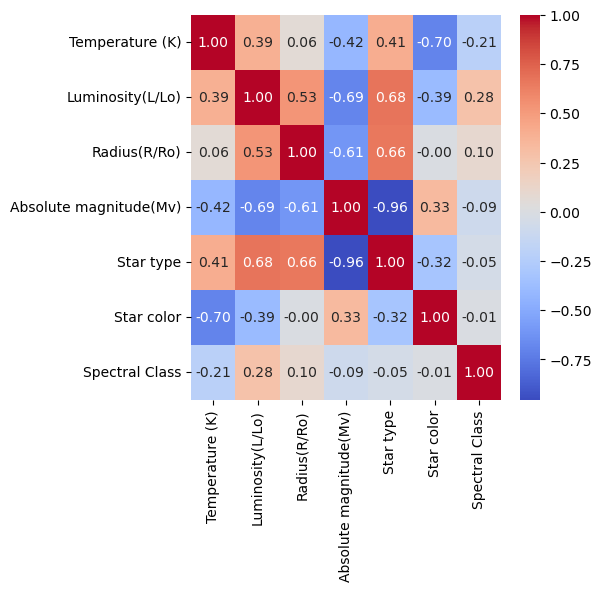

In [9]:
#Correlation Matrix Heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix,annot=True , cmap='coolwarm' , fmt='.2f')
plt

In [10]:
#Identify Low Correlated Features
correlation_matrix = df.corr()

threshold = 0.4  
low_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are low correlated.")

Temperature (K) and Absolute magnitude(Mv) are low correlated.
Temperature (K) and Star type are low correlated.
Temperature (K) and Star color are low correlated.
Luminosity(L/Lo) and Radius(R/Ro) are low correlated.
Luminosity(L/Lo) and Absolute magnitude(Mv) are low correlated.
Luminosity(L/Lo) and Star type are low correlated.
Radius(R/Ro) and Luminosity(L/Lo) are low correlated.
Radius(R/Ro) and Absolute magnitude(Mv) are low correlated.
Radius(R/Ro) and Star type are low correlated.
Absolute magnitude(Mv) and Temperature (K) are low correlated.
Absolute magnitude(Mv) and Luminosity(L/Lo) are low correlated.
Absolute magnitude(Mv) and Radius(R/Ro) are low correlated.
Absolute magnitude(Mv) and Star type are low correlated.
Star type and Temperature (K) are low correlated.
Star type and Luminosity(L/Lo) are low correlated.
Star type and Radius(R/Ro) are low correlated.
Star type and Absolute magnitude(Mv) are low correlated.
Star color and Temperature (K) are low correlated.


In [11]:
#Drop Low Correlated Feature
df.drop("Absolute magnitude(Mv)", axis=1)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,0,10,5
1,3042,0.000500,0.1542,0,10,5
2,2600,0.000300,0.1020,0,10,5
3,2800,0.000200,0.1600,0,10,5
4,1939,0.000138,0.1030,0,10,5
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,5,0,6
236,30839,834042.000000,1194.0000,5,0,6
237,8829,537493.000000,1423.0000,5,11,0
238,9235,404940.000000,1112.0000,5,11,0


<Axes: title={'center': 'Bar Plot Of Star Type'}, xlabel='Star type', ylabel='Star Type Count'>

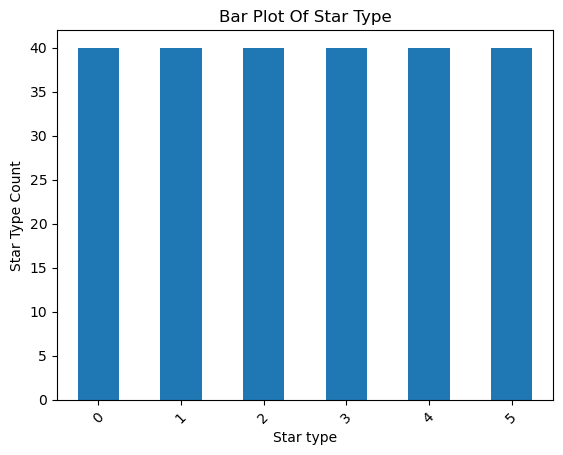

In [12]:
# Create a bar chart to show the distribution of star type 0
plt.xlabel("Star Type")
plt.ylabel("Star Type Count")
plt.title("Bar Plot Of Star Type")

vc = df['Star type'].value_counts()
vc.plot.bar(rot=45)

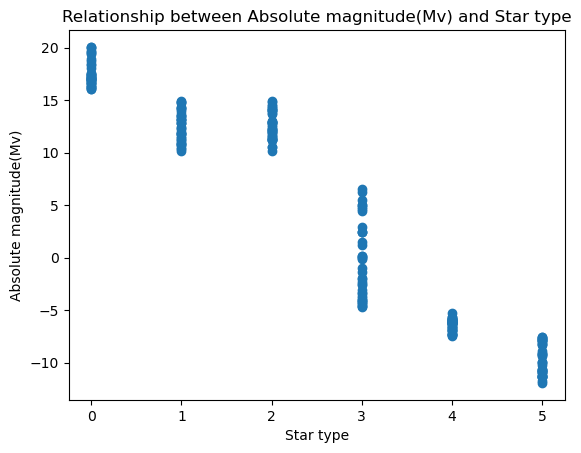

In [13]:
# Create a scatter plot to show the relationship between Star type and Absolute magnitude(Mv)
plt.scatter(df['Star type'], df['Absolute magnitude(Mv)'])
plt.xlabel('Star type')
plt.ylabel('Absolute magnitude(Mv)')
plt.title('Relationship between Absolute magnitude(Mv) and Star type')
plt.show()

# Machine Learning Models

In [14]:
#Machine Learning - Classification
#Data Splitting
x = df.drop('Star type', axis=1)
y = df['Star type']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=42)

In [15]:
#K-Nearest Neighbors (KNN)
n_neighbors=50
scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

max_value = max(scores)
max_index = scores.index(max_value) +1
print('---------------------')
print('The best value of k neighbors is : ' ,max_index)
print('The best value of accuracy from Knn trainng is : ',max_value)

Accuracy for k= 1 is: 0.48
Accuracy for k= 2 is: 0.48
Accuracy for k= 3 is: 0.48
Accuracy for k= 4 is: 0.48
Accuracy for k= 5 is: 0.48
Accuracy for k= 6 is: 0.48
Accuracy for k= 7 is: 0.48
Accuracy for k= 8 is: 0.48
Accuracy for k= 9 is: 0.5
Accuracy for k= 10 is: 0.48
Accuracy for k= 11 is: 0.5
Accuracy for k= 12 is: 0.5
Accuracy for k= 13 is: 0.5
Accuracy for k= 14 is: 0.5
Accuracy for k= 15 is: 0.5
Accuracy for k= 16 is: 0.52
Accuracy for k= 17 is: 0.54
Accuracy for k= 18 is: 0.56
Accuracy for k= 19 is: 0.56
Accuracy for k= 20 is: 0.56
Accuracy for k= 21 is: 0.58
Accuracy for k= 22 is: 0.56
Accuracy for k= 23 is: 0.54
Accuracy for k= 24 is: 0.58
Accuracy for k= 25 is: 0.54
Accuracy for k= 26 is: 0.52
Accuracy for k= 27 is: 0.52
Accuracy for k= 28 is: 0.52
Accuracy for k= 29 is: 0.52
Accuracy for k= 30 is: 0.56
Accuracy for k= 31 is: 0.54
Accuracy for k= 32 is: 0.52
Accuracy for k= 33 is: 0.5
Accuracy for k= 34 is: 0.52
Accuracy for k= 35 is: 0.5
Accuracy for k= 36 is: 0.5
Accuracy f

Text(0, 0.5, 'Testing Accuracy')

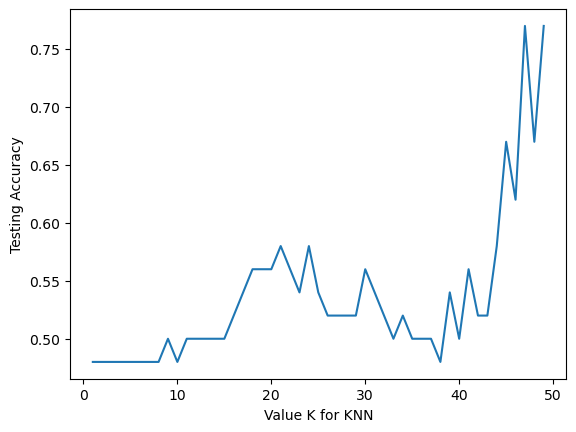

In [16]:
#KNN Accuracy Plot
plt.plot(range(1,50),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [17]:
#Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion="gini", splitter='random', max_depth=6, min_samples_split=12)
dtree.fit(x_train, y_train)   
y_pred1 = dtree.predict(x_test)   
print("Score: {}".format(accuracy_score(y_test, y_pred1)))

Score: 0.9375


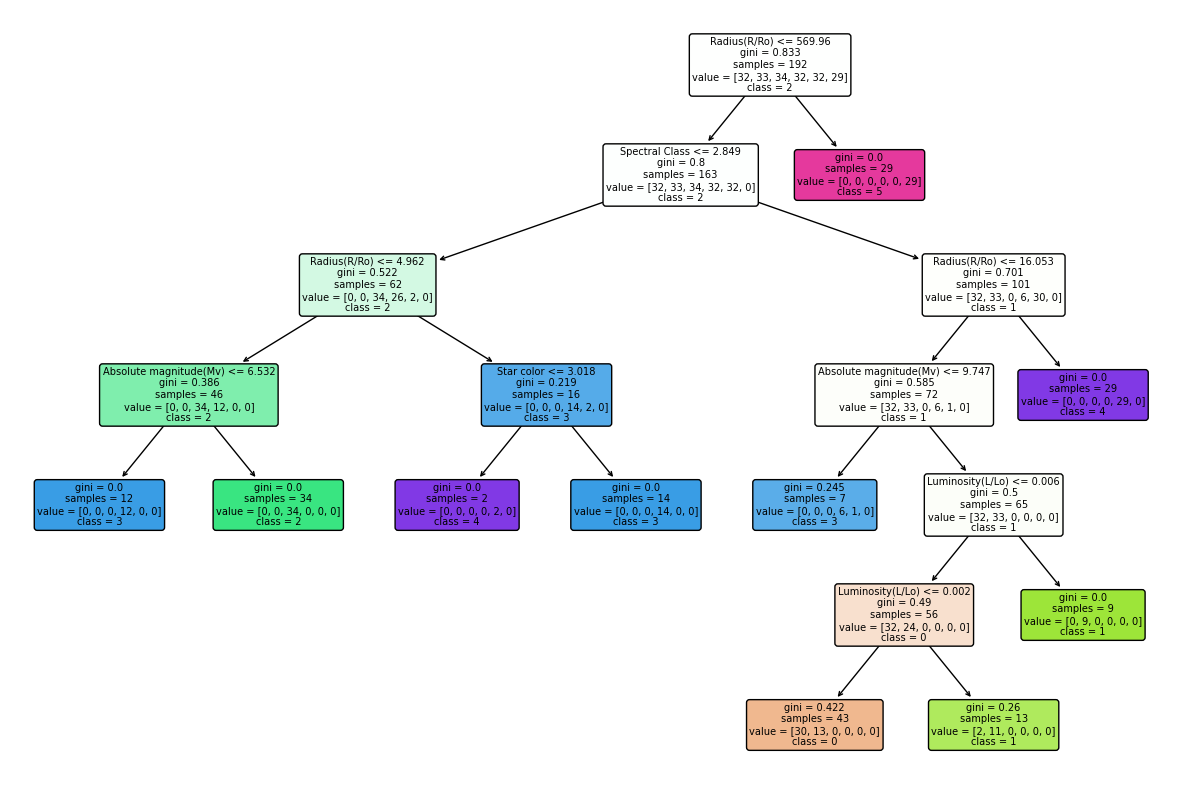

In [18]:
from sklearn.tree import DecisionTreeClassifier  # Assuming dtree is a trained DecisionTreeClassifier
from sklearn.tree._export import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dtree, feature_names=list(x.columns), class_names=["0", "1", "2", "3", "4", "5"], 
          filled=True, rounded=True)
plt.show()

In [19]:
#classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.71      0.83         7
           2       1.00      1.00      1.00         6
           3       0.89      1.00      0.94         8
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        11

    accuracy                           0.94        48
   macro avg       0.95      0.93      0.93        48
weighted avg       0.95      0.94      0.94        48



In [20]:
#Random Forest Classifier
clf=RandomForestClassifier(n_estimators=2)  
clf.fit(x_train, y_train)  
y_pred2=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8541666666666666


In [21]:
#Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Create a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000)

model.fit(X_scaled, y)

X_test_scaled = scaler.transform(x_test)

accuracy = model.score(X_test_scaled, y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9791666666666666


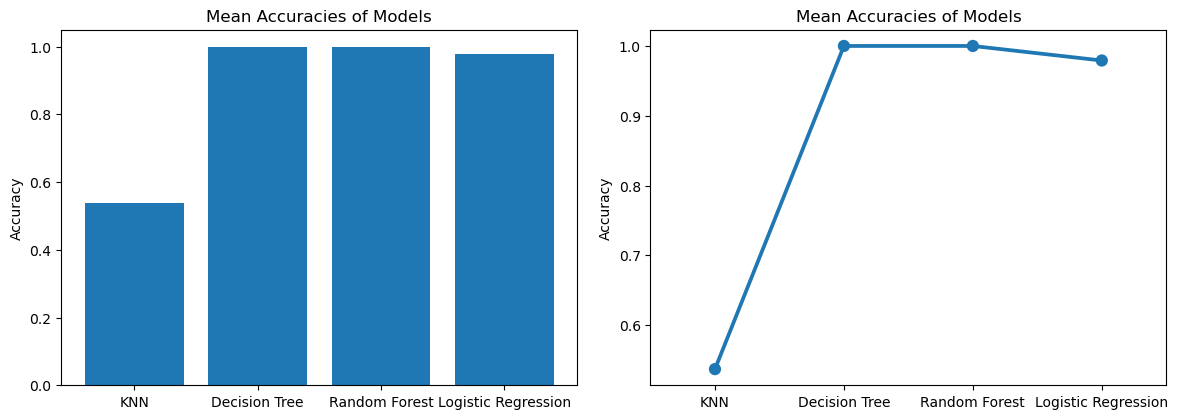

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# We have have already defined x_train, x_test, y_train, y_test, and df

# KNN
knn_scores = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    knn_scores.append(accuracy_score(y_pred, y_test))

# Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion="gini", splitter='random', max_depth=6, min_samples_split=12)
dtree.fit(x_train, y_train)
y_pred_dtree = dtree.predict(x_test)
dtree_score = accuracy_score(y_test, y_pred_dtree)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred_rf = clf.predict(x_test)
rf_score = accuracy_score(y_test, y_pred_rf)

# Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_score = accuracy_score(y_test, y_pred_logreg)

# Store accuracies and model names
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']
accuracies = [knn_scores, [dtree_score], [rf_score], [logreg_score]]

df_acc = pd.DataFrame(accuracies, index=model_names).T

# Plotting different types of graphs
plt.figure(figsize=(12, 8))

# Bar plot
plt.subplot(2, 2, 1)
plt.bar(model_names, df_acc.mean())
plt.title('Mean Accuracies of Models')
plt.ylabel('Accuracy')

# Point plot
plt.subplot(2, 2, 2)
sns.pointplot(x=model_names, y=df_acc.mean())
plt.title('Mean Accuracies of Models')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [23]:
#Creating and Predicting New Data
new_data = {
    'Temperature (K)': [4000],
    'Luminosity(L/Lo)': [0.001],
    'Radius(R/Ro)': [0.2],
    'Absolute magnitude(Mv)': [12.0],
    'Star color': ['0'],
    'Spectral Class': ['2']
}

new_data_df = pd.DataFrame(new_data)

new_data_prediction = clf.predict(new_data_df)
new_data_prediction1 = dtree.predict(new_data_df)
new_data_prediction2 = knn.predict(new_data_df)
new_data_prediction3 = model.predict(new_data_df)

'''Random Forest'''
print("The result of random forest training is : " )
if new_data_prediction[0] == 0:
    print("The star is a Brown Dwarf")
elif new_data_prediction[0] == 1:
    print("The star is a Red Dwarf")
elif new_data_prediction[0] == 2:
    print("The star is a White Dwarf")
elif new_data_prediction[0] == 3:
    print("The star is a Main Sequence star")
elif new_data_prediction[0] == 4:
    print("The star is a Supergiant")
else:
    print("The star is a Hypergiant")
print('\n')

'''Decision Tree'''
print("The result of decision tree training is : " )
if new_data_prediction1[0] == 0:
    print("The star is a Brown Dwarf")
elif new_data_prediction1[0] == 1:
    print("The star is a Red Dwarf")
elif new_data_prediction1[0] == 2:
    print("The star is a White Dwarf")
elif new_data_prediction1[0] == 3:
    print("The star is a Main Sequence star")
elif new_data_prediction1[0] == 4:
    print("The star is a Supergiant")
else:
    print("The star is a Hypergiant")
print('\n')

'''Knn'''
print("The result of Knn training is : " )
if new_data_prediction2[0] == 0:
    print("The star is a Brown Dwarf")
elif new_data_prediction2[0] == 1:
    print("The star is a Red Dwarf")
elif new_data_prediction2[0] == 2:
    print("The star is a White Dwarf")
elif new_data_prediction2[0] == 3:
    print("The star is a Main Sequence star")
elif new_data_prediction2[0] == 4:
    print("The star is a Supergiant")
else:
    print("The star is a Hypergiant")
print('\n')

'''Logistic Regression'''
print("The result of Logistic Regression training is : " )
if new_data_prediction3[0] == 0:
    print("The star is a Brown Dwarf")
elif new_data_prediction3[0] == 1:
    print("The star is a Red Dwarf")
elif new_data_prediction3[0] == 2:
    print("The star is a White Dwarf")
elif new_data_prediction3[0] == 3:
    print("The star is a Main Sequence star")
elif new_data_prediction3[0] == 4:
    print("The star is a Supergiant")
else:
    print("The star is a Hypergiant")
print('\n')

The result of random forest training is : 
The star is a Red Dwarf


The result of decision tree training is : 
The star is a White Dwarf


The result of Knn training is : 
The star is a Red Dwarf


The result of Logistic Regression training is : 
The star is a White Dwarf




C:\Users\sha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
